# Exploratory Data Analysis in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

Inspired by the wonderful EDA on Pokemon Data by [Redwan Huq](http://inmachineswetrust.com/posts/exploring-pokemon-dataset/).

![Gotta Catch 'Em All!](images/PokemonIntro.png)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [5]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [6]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [7]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

## Explore the Dataset

Exploring any dataset requires a solid understanding of the domain -- it is Pokemon, in our case.    
We understand the following basics regarding Pokemon, primarily from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon) and [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Generation).    

> **Generation** : There are seven generations of Pokemon as of 2018, with 721 till Generation VI (this dataset).   
> **Type** : Every Pokemon has a *primary* type, and some of them also have a *secondary* type -- dual-type ones.    
> **Legendary** : These Pokemons are rare, powerful, and really hard to catch -- there are 38 upto Generation VI.    

Way more trivia about Pokemon is available online -- but let's come back and retrieve more information from the data.

In [8]:
# Information about the Variables
pkmndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


#### Generations of Pokemon in the Dataset

Number of Generations : 6
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


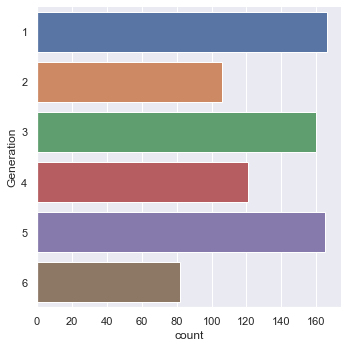

In [9]:
# Generations in the Dataset
print("Number of Generations :", len(pkmndata["Generation"].unique()))

# Pokemons in each Generation
print(pkmndata["Generation"].value_counts())
sb.catplot(y = "Generation", data = pkmndata, kind = "count")

#### Types of Pokemon in the Dataset

![Types of Pokemon](images/PokemonTypes.png)

We understand that there are 18 Sun and Moon types for Pokemons, as shown in the image above, and some have both the Sun and Moon types.   

Number of Primary Types : 18
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


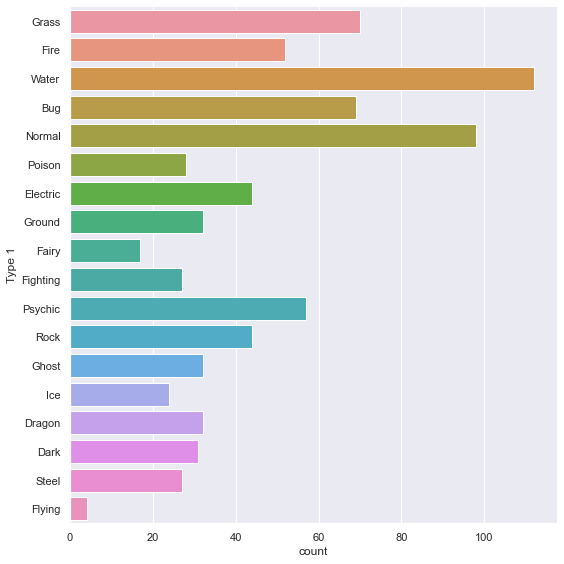

In [10]:
# Primary Types in the Dataset
print("Number of Primary Types :", len(pkmndata["Type 1"].unique()))

# Pokemons of each Primary Type
print(pkmndata["Type 1"].value_counts())
sb.catplot(y = "Type 1", data = pkmndata, kind = "count", height = 8)

Number of Secondary Types : 18
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


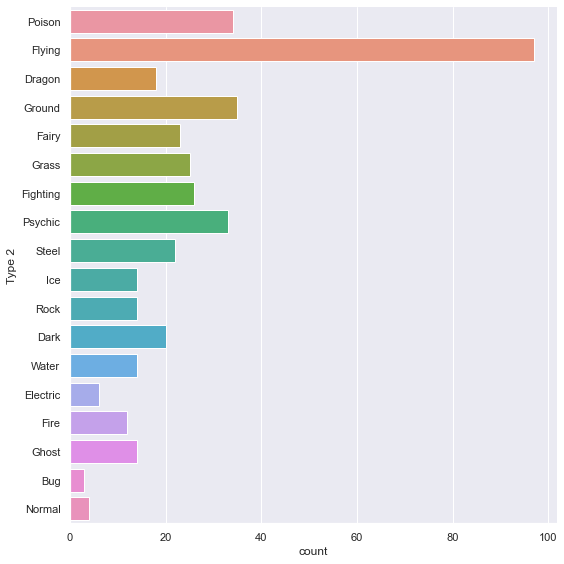

In [11]:
# Secondary Types in the Dataset
print("Number of Secondary Types :", len(pkmndata["Type 2"].dropna().unique()))

# Pokemons of each Secondary Type
print(pkmndata["Type 2"].dropna().value_counts())
sb.catplot(y = "Type 2", data = pkmndata, kind = "count", height = 8)

In [12]:
# Pokemons with a Single Type -- I
singletype_data = pkmndata[pkmndata["Type 2"].isnull()]
print("Pokemons with just Type 1 :", len(singletype_data))
singletype_data.head()

Pokemons with just Type 1 : 386


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [13]:
# Pokemons with Dual Types -- I and II
dualtype_data = pkmndata[pkmndata["Type 2"].isnull() == False]
print("Pokemons with Types 1 and 2 :", len(dualtype_data))
dualtype_data.head()

Pokemons with Types 1 and 2 : 414


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


#### Types of Pokemon over Generations

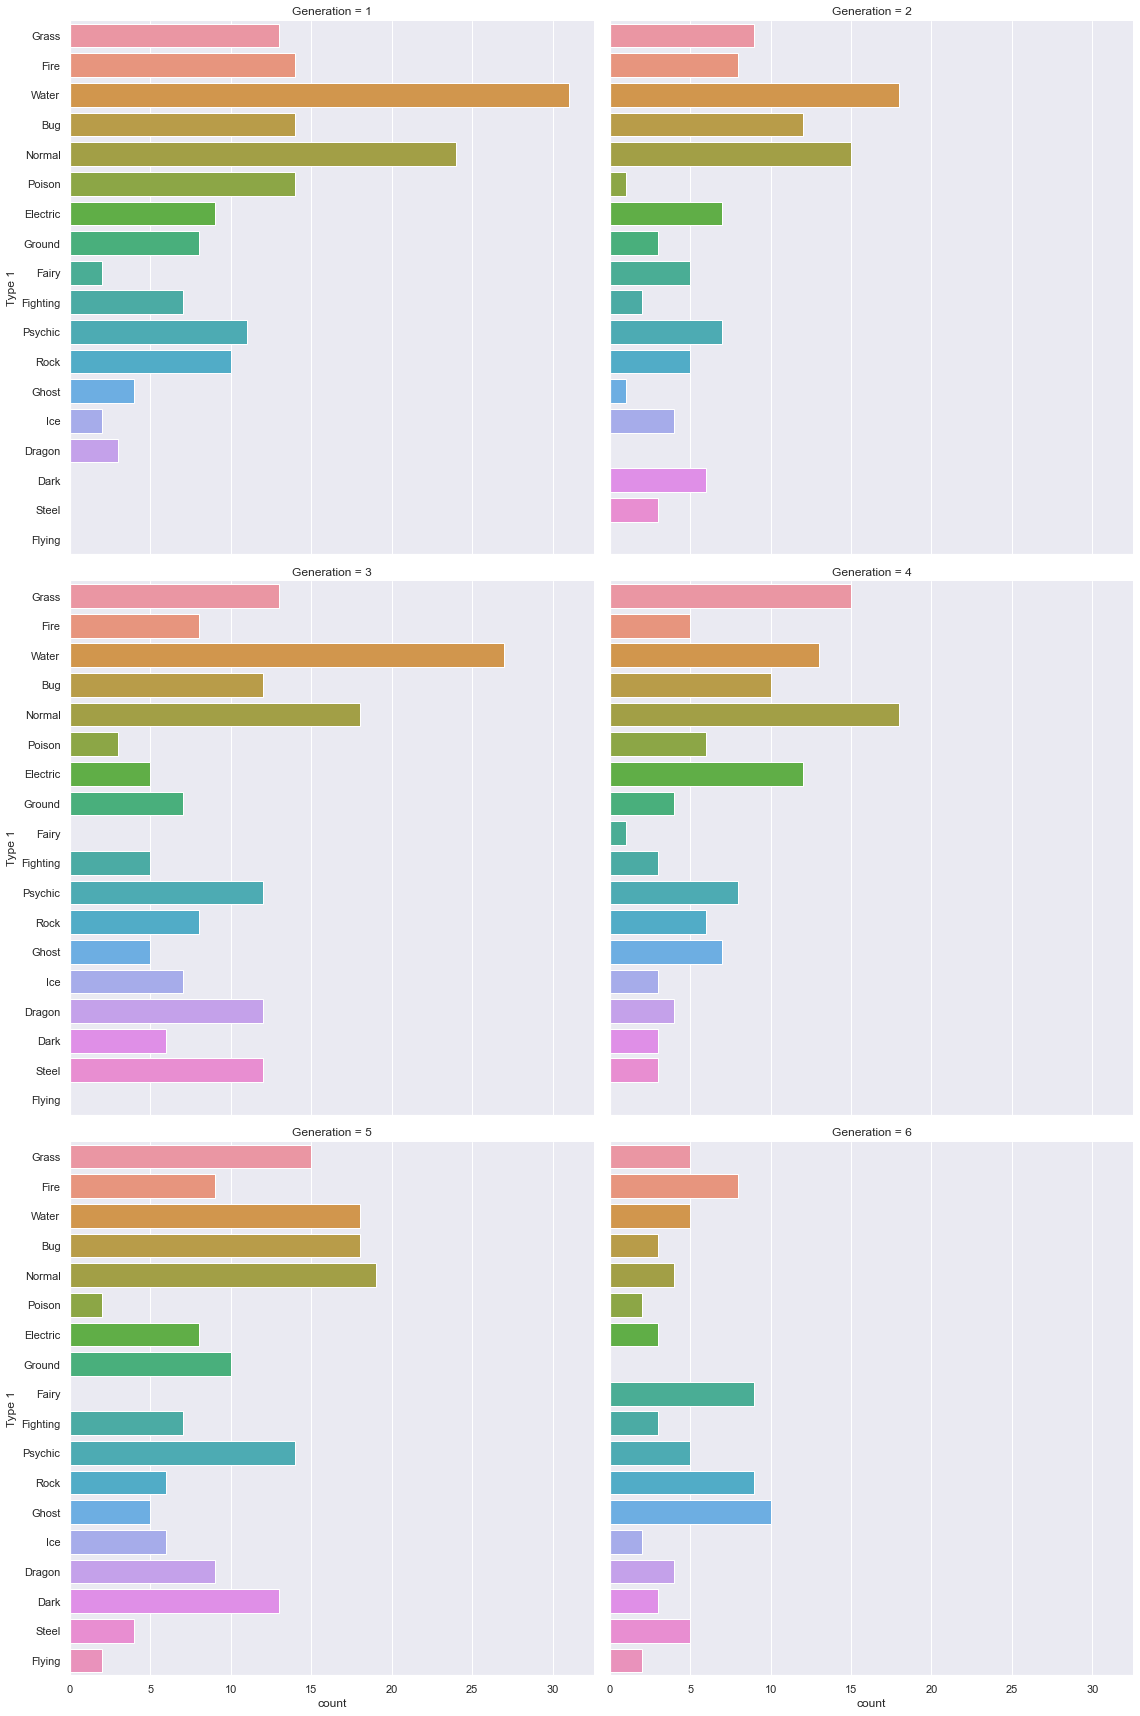

In [14]:
# Primary Type over Generations
sb.catplot(y = 'Type 1', data = pkmndata, col = 'Generation', kind = 'count', col_wrap = 2, height = 8)

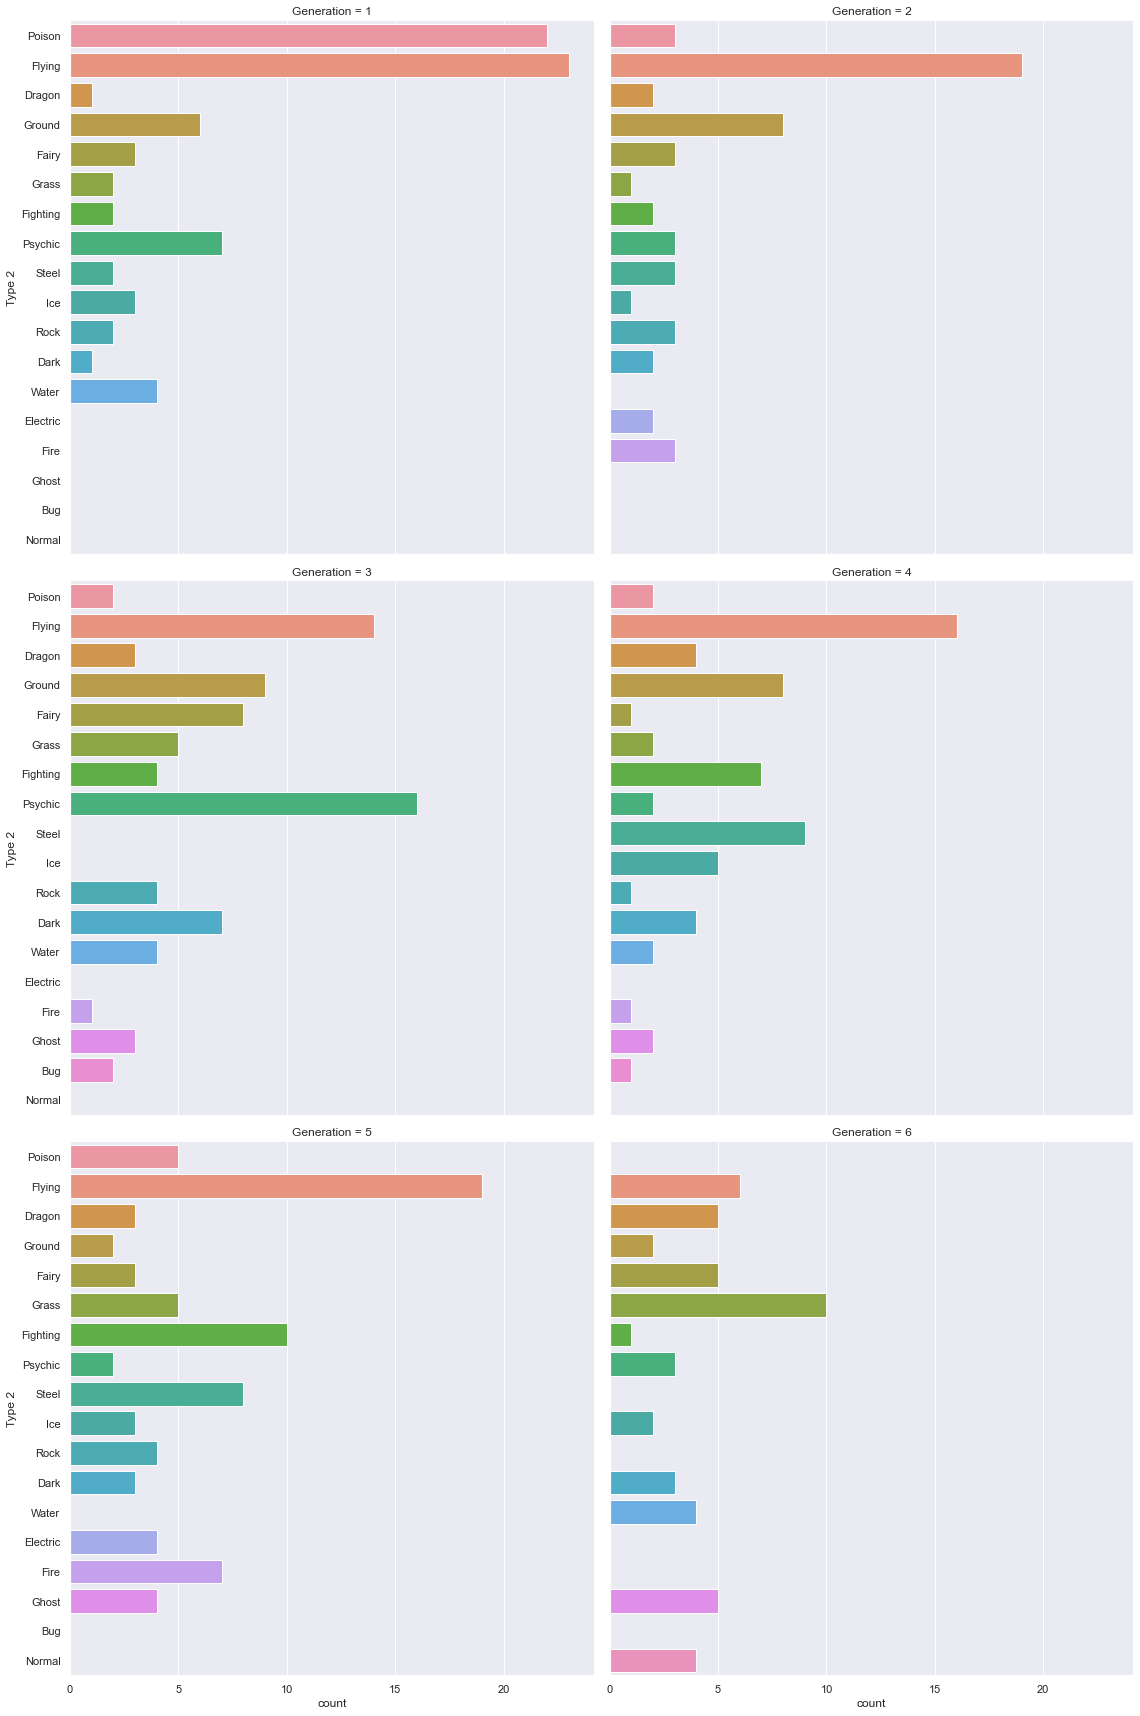

In [15]:
# Secondary Type over Generations
sb.catplot(y = 'Type 2', data = pkmndata, col = 'Generation', kind = 'count', col_wrap = 2, height = 8)

#### Type distribution of Dual-Type Pokemons

Pokemons with Types 1 and 2 : 414


<AxesSubplot:xlabel='Type 2', ylabel='Type 1'>

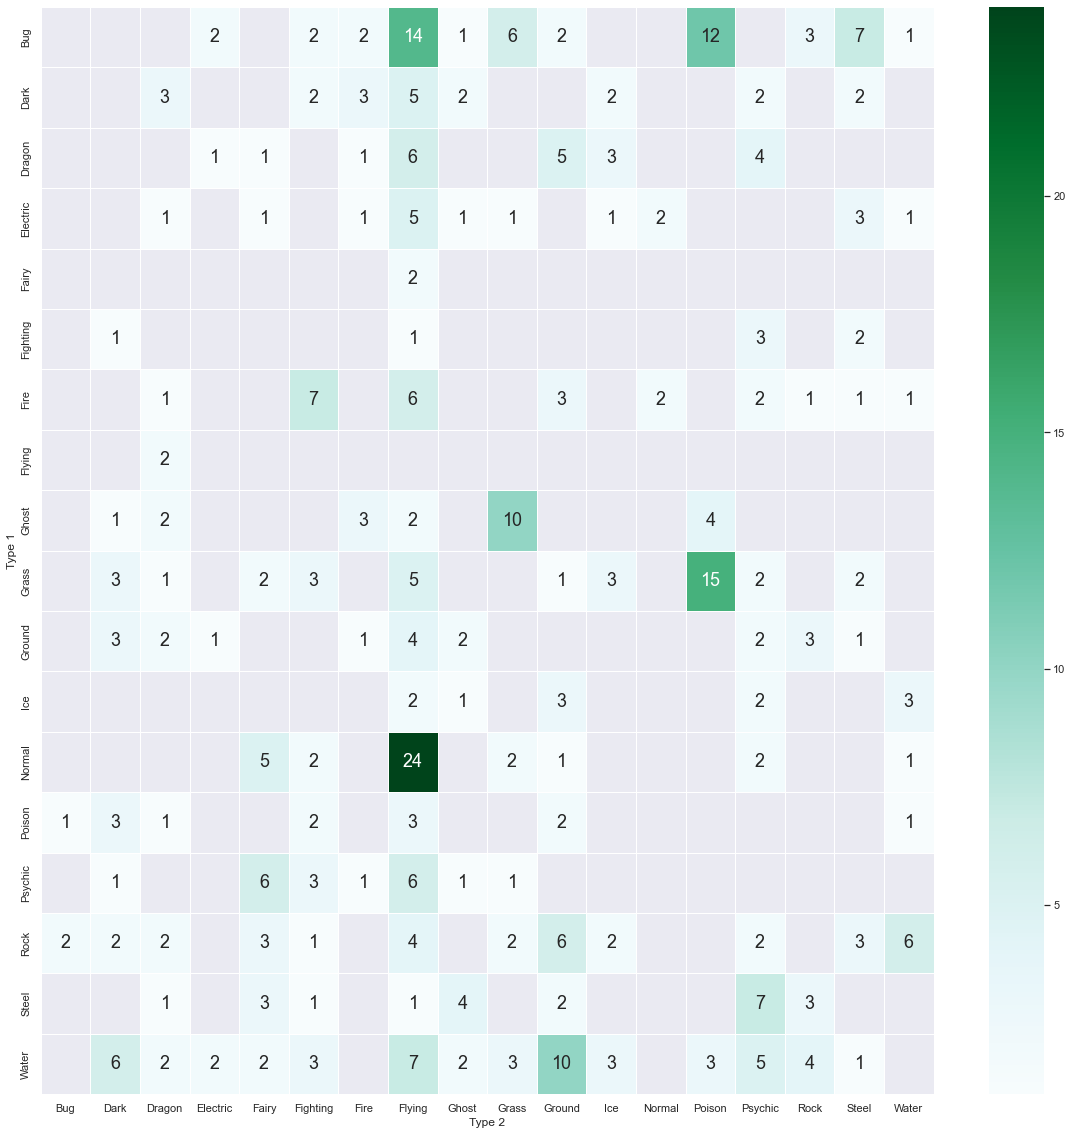

In [16]:
# Pokemons with Dual Types -- I and II
dualtype_data = pkmndata[pkmndata["Type 2"].isnull() == False]
print("Pokemons with Types 1 and 2 :", len(dualtype_data))

# Distribution of the Two Types
f = plt.figure(figsize=(20, 20))
sb.heatmap(dualtype_data.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Type 2', ylabel='Type 1'>

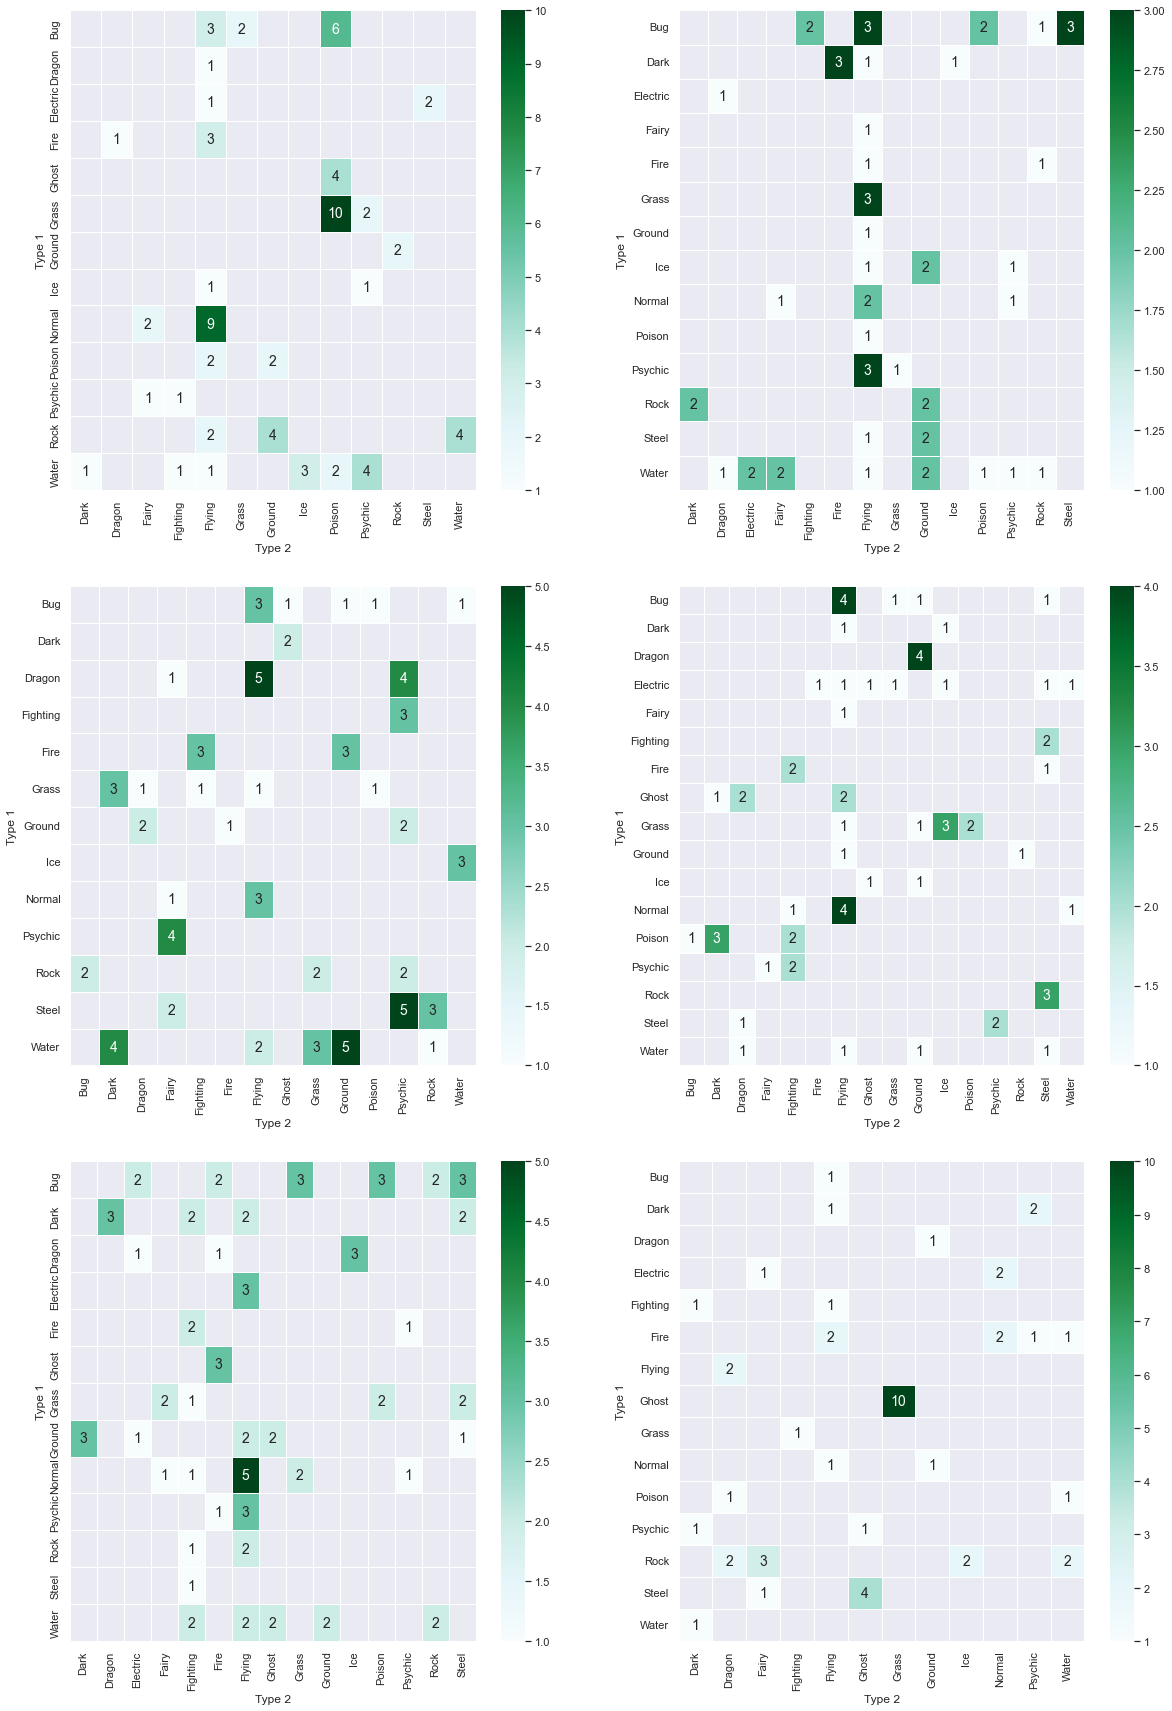

In [17]:
# Distribution of the Two Types over Generations
f, axes = plt.subplots(3, 2, figsize=(20, 30))

dualtype_gen1 = dualtype_data[dualtype_data["Generation"] == 1]
dualtype_gen2 = dualtype_data[dualtype_data["Generation"] == 2]
dualtype_gen3 = dualtype_data[dualtype_data["Generation"] == 3]
dualtype_gen4 = dualtype_data[dualtype_data["Generation"] == 4]
dualtype_gen5 = dualtype_data[dualtype_data["Generation"] == 5]
dualtype_gen6 = dualtype_data[dualtype_data["Generation"] == 6]

sb.heatmap(dualtype_gen1.groupby(['Type 1', 'Type 2']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,0])
sb.heatmap(dualtype_gen2.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,1])
sb.heatmap(dualtype_gen3.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,0])
sb.heatmap(dualtype_gen4.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,1])
sb.heatmap(dualtype_gen5.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2,0])
sb.heatmap(dualtype_gen6.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2,1])